In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

import tensorflow as tf
tf.test.gpu_device_name()

''

In [2]:
train = pd.read_csv('tabular-playground-series-jun-2021/train.csv')
test = pd.read_csv('tabular-playground-series-jun-2021/test.csv')


In [3]:
train

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,0,1,6,0,1,32,0,6,0,0,2,0,1,4,0,0,0,0,2,4,0,0,44,0,0,2,0,0,0,3,0,34,0,6,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,9,0,0,2,2,0,1,2,0,0,0,1,0,1,1,0,0,0,4,1,0,Class_6
199996,199996,0,2,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,1,1,0,3,0,0,0,0,1,1,0,0,0,7,0,0,0,1,0,2,0,1,0,0,2,9,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,Class_6
199997,199997,1,2,0,0,0,2,0,1,8,4,10,1,1,1,2,1,0,0,0,6,0,9,0,14,0,4,7,2,53,0,6,1,1,0,1,0,0,2,2,0,1,0,4,12,2,0,0,0,0,0,2,1,0,0,89,0,6,5,1,0,0,3,0,0,2,4,1,0,1,1,1,0,1,0,0,Class_8
199998,199998,0,0,2,0,2,1,0,0,3,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,2,0,2,1,0,0,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,0,0,1,0,Class_7


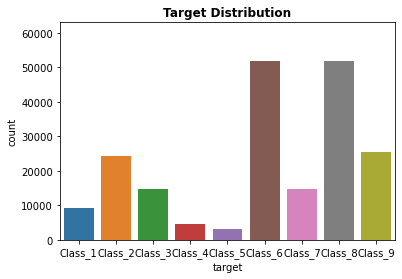

In [4]:
fig, ax = plt.subplots()
sns.countplot(x='target', data=train, order=sorted(train['target'].unique()), ax=ax)
ax.set_ylim(0, 63000)
ax.set_title('Target Distribution', weight='bold')
plt.show()

In [5]:
# Converting Target column to int values and splitting targets
label_dict = {val:idx for idx, val in enumerate(sorted(train['target'].unique()))}
train['target'] = train['target'].map(label_dict)

target = train['target']
train.drop(['target'], inplace=True, axis=1)
train.drop(['id'], inplace=True, axis=1)
test.drop(['id'], inplace=True, axis=1)

In [6]:
print(train.shape)
print(target.shape)

(200000, 75)
(200000,)


In [7]:
train.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
feature_0,200000.000000,0.972710,3.941836,0.000000,0.000000,0.000000,1.000000,61.000000
feature_1,200000.000000,1.168365,3.993407,0.000000,0.000000,0.000000,1.000000,51.000000
feature_2,200000.000000,2.219325,6.476570,0.000000,0.000000,0.000000,1.000000,64.000000
feature_3,200000.000000,2.296735,7.551858,0.000000,0.000000,0.000000,1.000000,70.000000
feature_4,200000.000000,0.793530,2.935785,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,200000.000000,1.431105,5.162746,0.000000,0.000000,0.000000,1.000000,76.000000
feature_6,200000.000000,1.010695,3.949231,0.000000,0.000000,0.000000,0.000000,43.000000
feature_7,200000.000000,0.673090,2.234949,0.000000,0.000000,0.000000,0.000000,30.000000
feature_8,200000.000000,1.943980,3.931330,0.000000,0.000000,0.000000,2.000000,38.000000
feature_9,200000.000000,1.719655,5.916988,0.000000,0.000000,0.000000,1.000000,72.000000


In [8]:
# Checking Null values
# pd.options.display.max_rows = 4000
# train.isnull().values.any()
# target.isnull().values.any()
test.isnull().values.any()

False

In [9]:
# inspecting features in train data
train.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,0.972710,1.168365,2.219325,2.296735,0.793530,1.431105,1.010695,0.673090,1.94398,1.719655,1.422550,0.980955,2.444760,1.078085,1.406445,1.413200,1.389720,0.317740,1.656610,6.186895,1.438510,1.031415,1.465935,0.572000,1.061165,2.348775,0.774490,0.789325,2.326190,1.581820,0.598825,1.856545,1.516105,1.556650,0.681135,1.162070,0.665375,1.500505,1.276080,2.332940,1.255005,1.159385,0.834600,4.472965,0.890300,0.690865,2.413920,0.969055,1.527270,0.479560,2.275075,1.617085,0.622570,1.354225,6.008040,2.493365,2.118190,0.566695,0.927100,1.343715,1.666660,1.287270,2.764225,1.455190,0.696915,1.798040,0.508695,1.827300,0.910370,1.603585,1.219210,0.806895,1.282925,2.94021,0.632005
std,3.941836,3.993407,6.476570,7.551858,2.935785,5.162746,3.949231,2.234949,3.93133,5.916988,3.288376,3.837771,3.421765,3.713650,2.868740,8.240441,3.056888,1.052619,2.557042,13.982531,2.666167,2.931762,6.734983,1.676326,5.718083,7.319992,1.752804,3.517043,8.402752,5.565404,1.418070,3.898896,7.782723,3.913513,2.307127,3.443417,2.637001,2.900480,4.268174,4.523171,4.482382,5.407836,3.496194,7.723795,2.150593,2.188692,9.774465,5.845938,4.375537,2.056233,5.227827,5.149637,1.953864,2.960980,11.286352,8.787684,4.107152,2.023164,2.697104,6.168400,6.387178,5.480586,8.251200,7.121127,2.185252,5.053014,1.867330,7.188924,3.835182,4.877679,4.826003,2.458741,4.261420,10.78465,3.925310
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

In [10]:
# from sklearn.decomposition import PCA
# pca = PCA().fit(train)

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (15,10)

# fig, ax = plt.subplots()
# xi = np.arange(1, 76, step=1)
# y1 = np.cumsum(pca.explained_variance_ratio_)

# plt.ylim(0.0,1.1)
# plt.plot(xi, y1, marker='o', linestyle='--', color='g')

# plt.xlabel('Number of Components')
# plt.xticks(np.arange(0, 76, step=1)) #change from 0-based array index to 1-based human-readable label
# plt.ylabel('Cumulative variance (%)')
# plt.title('The number of components needed to explain variance')

# plt.axhline(y=0.95, color='r', linestyle='-')
# plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# ax.grid(axis='x')
# plt.show()

In [11]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 53)
# train = pca.fit_transform(train)
# test = pca.transform(test)

In [12]:
# Normalizing data
from sklearn import preprocessing
train = preprocessing.normalize(train)
test = preprocessing.normalize(test)

In [13]:
# Converting target to categorial values
from keras.utils import to_categorical
# train = train.values
target = target.values
target =  to_categorical(target)

In [14]:
# Splitting Train data for training and validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train, target, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(160000, 75)
(160000, 9)
(40000, 75)
(40000, 9)


In [15]:
# Deep Neural Network 

In [16]:
# Hyper parameters
from keras import optimizers

# Learning rate
learning_rate = 0.01

# Epoch  
epochs = 50

# Batch size
batch_size = 100

# Optimizer
opt = optimizers.Adam(lr=learning_rate)

In [17]:
# Sequential Model
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import activations
from tensorflow.keras.layers import Dropout, BatchNormalization

model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 75))
Dropout(0.5)
model.add(Dense(250, activation='relu'))
Dropout(0.5)
model.add(Dense(9, activation='softmax'))
# use_bias=False

In [18]:
# Complie the model

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               38000     
_________________________________________________________________
dense_1 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2259      
Total params: 165,509
Trainable params: 165,509
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    validation_data=(x_val, y_val),
    epochs=epochs,
    verbose = 1
)

Epoch 1/50
1600/1600 [==============================] - 3s 2ms/step - loss: 1.8163 - accuracy: 0.3327 - val_loss: 1.7809 - val_accuracy: 0.3485
Epoch 2/50
1600/1600 [==============================] - 2s 1ms/step - loss: 1.7805 - accuracy: 0.3480 - val_loss: 1.7766 - val_accuracy: 0.3503
Epoch 3/50
1600/1600 [==============================] - 2s 1ms/step - loss: 1.7693 - accuracy: 0.3528 - val_loss: 1.7755 - val_accuracy: 0.3491
Epoch 4/50
1600/1600 [==============================] - 2s 1ms/step - loss: 1.7623 - accuracy: 0.3563 - val_loss: 1.7755 - val_accuracy: 0.3476
Epoch 5/50
1600/1600 [==============================] - 2s 1ms/step - loss: 1.7577 - accuracy: 0.3589 - val_loss: 1.7782 - val_accuracy: 0.3503
Epoch 6/50
1600/1600 [==============================] - 2s 2ms/step - loss: 1.7551 - accuracy: 0.3598 - val_loss: 1.7774 - val_accuracy: 0.3487
Epoch 7/50
1600/1600 [==============================] - 2s 2ms/step - loss: 1.7486 - accuracy: 0.3609 - val_loss: 1.7769 - val_accuracy:

In [21]:
a = history.history.get('val_accuracy')[-1]
print('Accuracy on Validation data: %.2f' % (a*100))

Accuracy on Validation data: 33.32


<function matplotlib.pyplot.show(close=None, block=None)>

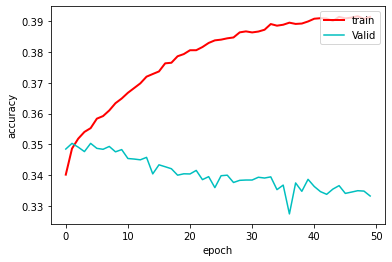

In [22]:
plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'c-',  label='accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show


In [23]:
sample_submission = pd.read_csv('tabular-playground-series-jun-2021/sample_submission.csv')
sample_submission[['Class_1','Class_2', 'Class_3', 'Class_4','Class_5','Class_6', 'Class_7', 'Class_8','Class_9']] = model.predict(test)

In [24]:
sample_submission

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,200000,0.100248,0.422118,0.172703,0.024711,0.012662,0.075505,0.017828,0.029719,0.144505
1,200001,0.044566,0.105413,0.087978,0.027520,0.020963,0.200608,0.084419,0.265302,0.163231
2,200002,0.021326,0.041831,0.029483,0.015934,0.005924,0.599041,0.031504,0.195941,0.059016
3,200003,0.013131,0.001754,0.001012,0.003443,0.001592,0.319788,0.051422,0.598993,0.008865
4,200004,0.038397,0.037800,0.027952,0.018011,0.011750,0.282352,0.088592,0.412344,0.082801
...,...,...,...,...,...,...,...,...,...,...
99995,299995,0.042483,0.199302,0.201810,0.019465,0.006123,0.001636,0.069169,0.326826,0.133186
99996,299996,0.057661,0.151989,0.110954,0.029965,0.021188,0.185525,0.070043,0.195410,0.177264
99997,299997,0.044566,0.105413,0.087978,0.027520,0.020963,0.200608,0.084419,0.265302,0.163231
99998,299998,0.029323,0.100301,0.078044,0.024677,0.011507,0.428517,0.039812,0.171568,0.116252


In [25]:
sample_submission.to_csv(f'submission.csv',index=False)